In [ ]:
# 0. Run this code to import the libraries we will need. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopy
import io


# CS 48A Pandas Lab
## by Joanna Lankester, PhD

#### Directions: 
- Work through the exercises. Blocks with a * require an answer (either *Code, *Response which you can leave in the comments, or both). 
- Be sure to generally run cells from the top to the bottom of the notebook, because some code will be dependent on earlier code.
- (Recommended) When you have all your code how you want it, reload the notebook and re-run everything from the top sequentially before turning it in. You can use the "Run all" option from the menus, if you want.   
- Turn in the .ipynb file. If you are working in Google Colaboratory, go to File - Download .ipynb to get the file. 

# Part 1a

In this section, we will review: 
- selecting columns
- filtering rows by characteristic
- creating a new variable
- creating a boxplot, line plot, and heat map in seaborn

And we will learn something new about: 
- syntax for converting from wide to long format
- dropping columns
- combining multiple commands on a DataFrame
- what a pandas Index is
- how to set a DataFrame index

Be sure that you have downloaded ice_cream_by_shop.csv before starting. 

In [ ]:
# 1. Run this cell, click "Choose Files", and upload the ice_cream_by_shop.csv file from your computer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

# Note: this functionality works only for Google Colab in Chrome. 
# To run locally using Anaconda, use this instead of #1-2:
# ic_wide = pd.read_csv('filepath/ice_cream_by_shop.csv') 
# ...substituting the filepath with the location of this file on your computer. 

Saving ice_cream_by_shop.csv to ice_cream_by_shop.csv
User uploaded file "ice_cream_by_shop.csv" with length 384 bytes


In [ ]:
# 2. Run this cell to load the file into a data frame and look at that data frame. 
# Remember that the last item in a notebook cell will be printed automatically. 
# Use this functionality to check your work. 
ic_wide = pd.read_csv(io.StringIO(uploaded['ice_cream_by_shop.csv'].decode('utf-8')))
ic_wide

,ID,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3677,201 1st St 94022,42,55,92,45,68,124,132
1,1492,6421 Brady St 77011,122,113,123,117,115,122,122
2,5838,9 US-5 S 05045,148,155,143,177,187,203,206
3,4297,12345 El Monte Rd 94022,88,85,91,90,93,40,38
4,5336,2450 E Mason St 54302,99,102,105,102,97,135,144
5,3442,4301 University Way NE 98105,155,159,142,145,146,180,182


As we can see, this data set has a list of ice cream shops and their average sales for each day of the week. The shops each have an ID number, and their address is listed. 

The provided data is in wide format. As you know, most of the time when we use visualization software, we need data in long format. However, there are times when a wide format may work better for certain analyses. In this lab, we'll practice using both. 

## Practice selecting columns

In [ ]:
# 3. (*Code)
# Create a table of only the ID number, address, Wednesday, and Thursday ice cream
# sales columns from the data. 
#
# Your answer: 
import seaborn as sns
import pandas as pd

# Assuming you have a pandas DataFrame called 'data' with columns: ID, address, Wednesday, Thursday, and ice cream sales

# Selecting the desired columns from the DataFrame
selected_columns = ['ID', 'address', 'Wednesday', 'Thursday']
selected_data = ic_wide[selected_columns]
selected_data



,ID,address,Wednesday,Thursday
0,3677,201 1st St 94022,92,45
1,1492,6421 Brady St 77011,123,117
2,5838,9 US-5 S 05045,143,177
3,4297,12345 El Monte Rd 94022,91,90
4,5336,2450 E Mason St 54302,105,102
5,3442,4301 University Way NE 98105,142,145


## Converting to long format and viewing distributions

In [ ]:
# 4. (*Response) 
# Suppose I convert the original ic_wide data to long format, where every row will have an 
# ID, address, day of the week, and value sold on that day. How many rows do you
# expect, and why? 

# Your answer: 
#42 because there are 42 ice cream sales.
# 

In [ ]:
# 5. Run this code to convert the dataset to long format
ic_long = ic_wide.melt(id_vars=['ID','address'],value_name='count',var_name='day')
ic_long

,ID,address,day,count
0,3677,201 1st St 94022,Monday,42
1,1492,6421 Brady St 77011,Monday,122
2,5838,9 US-5 S 05045,Monday,148
3,4297,12345 El Monte Rd 94022,Monday,88
4,5336,2450 E Mason St 54302,Monday,99
5,3442,4301 University Way NE 98105,Monday,155
6,3677,201 1st St 94022,Tuesday,55
7,1492,6421 Brady St 77011,Tuesday,113
8,5838,9 US-5 S 05045,Tuesday,155
9,4297,12345 El Monte Rd 94022,Tuesday,85


Text(0.5, 1.0, 'Icecream sales per day, JO')

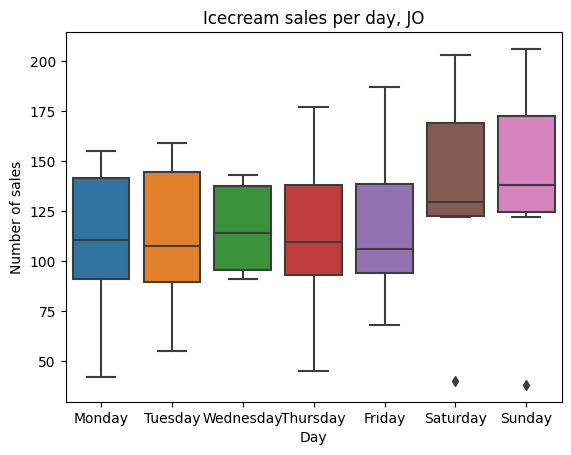

In [ ]:
# 6. (*Code)
# Create a boxplot for the count of ice creams purchased by day of the week using 
# the long data frame. Choose whether to make the plot horizontal or vertical 
# depending on how it is easiest to view the labels. 
# Here's some starter code: 

# Your answer:
ax = sns.boxplot(data=ic_long, x="day", y="count")
ax.set_xlabel("Day")
ax.set_ylabel("Number of sales")
ax.set_title("Icecream sales per day, JO")

 


Text(0.5, 1.0, 'Icecream sales per day,JO')

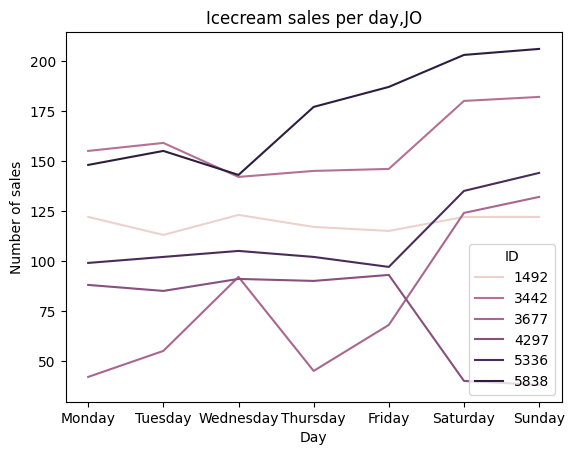

In [ ]:
# 7. (*Code)
# Using the ic_long dataframe, create a time-series plot that shows the amount
# of ice cream sold each day of the week. Encode each individual shop using color.
# Here's some starter code: 

# Your answer: 
ax = sns.lineplot(data=ic_long, x="day", y="count",hue="ID")
ax.set_xlabel("Day")
ax.set_ylabel("Number of sales")
ax.set_title("Icecream sales per day,JO")





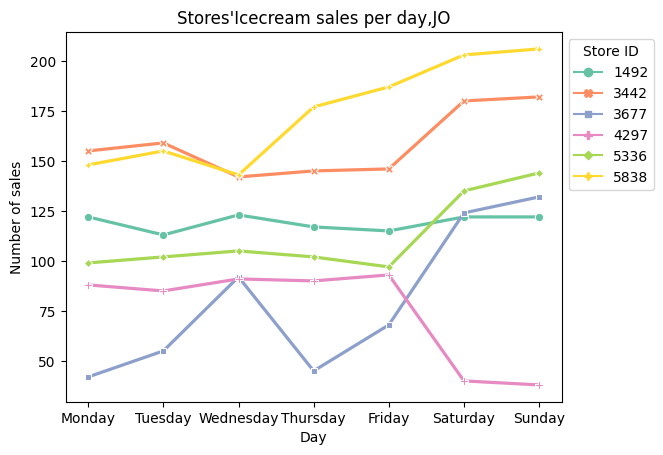

In [ ]:
# 8. (*Code)
# The above plot is a little hard to read. 
# Copy and paste your code from above, and modify it with all 3 of these changes. 
# You only need to display your plot once with all of these changes, but I recommend
# working on one of them at a time.

# (a) change the colors to something more distinguishable, yet easy to see
# for someone with colorblindness. 
# Hint: use the keyword palette=
# Hint: See this official documentation for some pre-made palette options: 
# https://seaborn.pydata.org/tutorial/color_palettes.html

# (b) Add redundant coding to further improve color accessibility. (Refer to the 
# module on color accessibility for categorical data.)

# (c) Use the linewidth keyword to make the lines thicker.

# (d) Put the following line at the end of your code in this cell: 
# ax.legend(bbox_to_anchor=(1,1))
# Here is a link about legend position options, if you are curious: 
# https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/



# Your answer: 
ax = sns.lineplot(data=ic_long, x="day", y="count",hue="ID", palette="Set2",style ="ID", markers=True, dashes =False, linewidth="2.3")
ax.set_xlabel("Day")
ax.set_ylabel("Number of sales")
ax.set_title("Stores'Icecream sales per day,JO")
ax.legend(bbox_to_anchor=(1,1),title="Store ID")


## Using wide data to plot a heat map, and explore dropping columns and setting index

In [ ]:
# 9. *(Response)
# Suppose we want to plot a heat map of ice cream sales for these stores.
# Uncomment and try this line of code: 
#sns.heatmap(data=ic_wide) 

# Why doesn't it work? What type of data is the heatmap function expecting? 
# Your answer: 
# There are string values in the table. It's expecting float values. 



# (To remove this error after answering, re-comment that
# line of code and re-run this cell.)

In [ ]:
# 10. Here's a solution: drop the address column temporarily. Run this to see the result. 
ic_wide.drop(columns='address')

,ID,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3677,42,55,92,45,68,124,132
1,1492,122,113,123,117,115,122,122
2,5838,148,155,143,177,187,203,206
3,4297,88,85,91,90,93,40,38
4,5336,99,102,105,102,97,135,144
5,3442,155,159,142,145,146,180,182


In [ ]:
# 11. The above block did not actually change the ic_wide DataFrame. Instead, 
# it just printed a copy of a _temporary_ DataFrame that has dropped the column.
# Run this to prove it to yourself: 
ic_wide

,ID,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3677,201 1st St 94022,42,55,92,45,68,124,132
1,1492,6421 Brady St 77011,122,113,123,117,115,122,122
2,5838,9 US-5 S 05045,148,155,143,177,187,203,206
3,4297,12345 El Monte Rd 94022,88,85,91,90,93,40,38
4,5336,2450 E Mason St 54302,99,102,105,102,97,135,144
5,3442,4301 University Way NE 98105,155,159,142,145,146,180,182


Text(0.5, 1.0, "Stores'Icecream sales per day,JO")

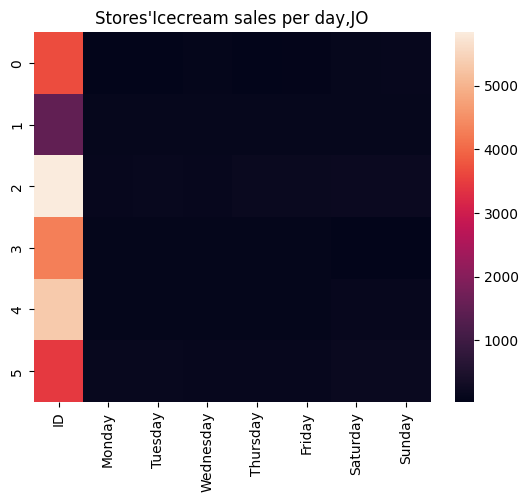

In [ ]:
# 12. (*Code)
# Write the code to create a heatmap (or copy-paste from item 9). 
# Instead of using data=ic_wide, make data be the line of code from item 10.
# We can use this temporary copy of a dataframe instead of saving it as another
# dataframe.

# Your answer: 
ax= sns.heatmap(data=ic_wide.drop(columns='address'))
ax.set_title("Stores'Icecream sales per day,JO")

In [ ]:
# 13. (*Response)
# Uh-oh! Why is this heat map useless? (look carefully at the x-axis and color 
# scale; compare to the dataframe)
# I.e. why are all the blocks on the days of the week the same color? (Please be
# as specific as possible.)

# Your answer: 
# All blocks are the same color because all daily sales for each store are within the sub 1000.  


We don't want to plot the values of the ID, but rather only the values of the day of the week. Also, we don't want the row numbers on the y-axis, but rather  the ID numbers. An easy way to accomplish both of these is to set the index of the data frame to the ID. 

Look toward the top at the wide data frame. You will see that the rows are numbered 0-5, and these numbers are in bold. These are the **indexes**, and they appear to be the row numbers. However, an **Index** in pandas is actually a unique identifier for a row. It does not have to be sequential, and it doesn't even have to be a number. 

In [ ]:
# 14. Run this code and see how this works. 
# Note that this will not permenantly change the DataFrame. Just like above, it
# is going to display a temporary copy. 
ic_wide.set_index('ID')

,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
ID,,,,,,,,
3677,201 1st St 94022,42,55,92,45,68,124,132
1492,6421 Brady St 77011,122,113,123,117,115,122,122
5838,9 US-5 S 05045,148,155,143,177,187,203,206
4297,12345 El Monte Rd 94022,88,85,91,90,93,40,38
5336,2450 E Mason St 54302,99,102,105,102,97,135,144
3442,4301 University Way NE 98105,155,159,142,145,146,180,182


In [ ]:
# 15. We can string together these two commands by putting the ".drop" command 
# followed by the ".set_index" command. Run this code. 
# We'll save it as a DataFrame for clarity.
ic_reformatted = ic_wide.drop(columns='address').set_index('ID')
ic_reformatted

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
ID,,,,,,,
3677,42,55,92,45,68,124,132
1492,122,113,123,117,115,122,122
5838,148,155,143,177,187,203,206
4297,88,85,91,90,93,40,38
5336,99,102,105,102,97,135,144
3442,155,159,142,145,146,180,182


Text(0.5, 1.0, "Stores' Icecream sales per day,JO")

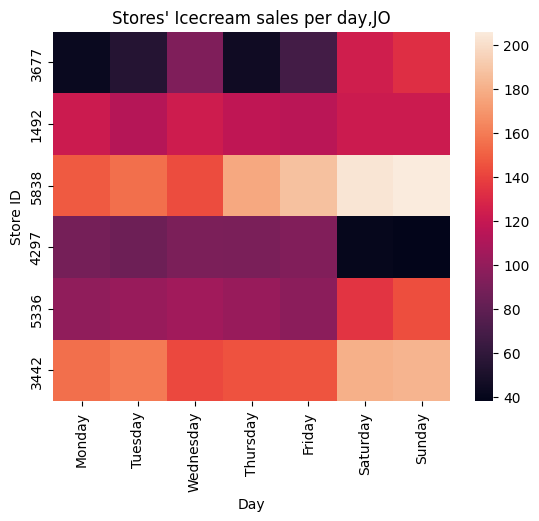

In [ ]:
# 16. (*Code) 
# Use the ic_reformatted to create a heat map. 
# Title and label as needed.
# Your answer: 
h_map= sns.heatmap(data=ic_reformatted)
h_map.set_xlabel("Day")
h_map.set_ylabel("Store ID")
h_map.set_title("Stores' Icecream sales per day,JO")


## Filtering rows on logical values

In [ ]:
# 17. (*Code and Response)
# From the heat map, we can see that one ice cream shop is in a business district 
# where people do not spend time on the weekend. Let's practice filtering rows
# by filtering out the data. 

# Use the original dataframe ic_wide for this part.
# a. (*Response) What is the ID number of this ice cream shop? 
# b. (*Code) Use logical indexing to print True for the row with that shop and False for the others. 
# c. (*Code) We want to get rid of that row. We therefore want to flip this to get False for
# that row and True for the others. Use negation in the logical indexing to produce
# the opposite result of part b. 
# d. (*Code) Use row selection combined with your answer to part c to print all the rows that 
# are not that row. 
# e. (*Code) Save your answer from part d into a dataframe called ic. 


In [ ]:
# Your answers: 
# a
#4297


In [ ]:
# b 
#x= ic_wide["ID"]
#for y in x :
#  if y== 4297:
#    print("ID "+str(y) +" True")
#  else:
#    print("ID "+str(y)+ " False")

for idx in ic_wide.index:
  if ic_wide['ID'][idx]==4297:
    print("ID "+str(ic_wide['ID'][idx])+ " True")
  else:
    print("ID "+str(ic_wide['ID'][idx])+ " False")
    

ID 3677 False
ID 1492 False
ID 5838 False
ID 4297 True
ID 5336 False
ID 3442 False


In [ ]:
# c
for idx in ic_wide.index:
  if ic_wide['ID'][idx]==4297:
    print("True")
  else:
    print(" False")

 False
 False
 False
True
 False
 False


In [ ]:
#Use row selection combined with your answer to part c to print all the rows that 
# are not that row.
for idx in ic_wide.index:
  if ic_wide['ID'][idx]!=4297:
    print(ic_wide.loc[[idx]])
  else:
    continue

     ID           address  Monday  Tuesday  Wednesday  Thursday  Friday  \
0  3677  201 1st St 94022      42       55         92        45      68   

   Saturday  Sunday  
0       124     132  
     ID              address  Monday  Tuesday  Wednesday  Thursday  Friday  \
1  1492  6421 Brady St 77011     122      113        123       117     115   

   Saturday  Sunday  
1       122     122  
     ID         address  Monday  Tuesday  Wednesday  Thursday  Friday  \
2  5838  9 US-5 S 05045     148      155        143       177     187   

   Saturday  Sunday  
2       203     206  
     ID                address  Monday  Tuesday  Wednesday  Thursday  Friday  \
4  5336  2450 E Mason St 54302      99      102        105       102      97   

   Saturday  Sunday  
4       135     144  
     ID                       address  Monday  Tuesday  Wednesday  Thursday  \
5  3442  4301 University Way NE 98105     155      159        142       145   

   Friday  Saturday  Sunday  
5     146       180

In [ ]:
# e
ic_data = []

for idx in ic_wide.index:
    if ic_wide['ID'][idx] != 4297:
        ic_data.append(ic_wide.loc[[idx]])
ic = pd.concat(ic_data)



# (leave this at the end of this cell to check your work: )
ic

,ID,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3677,201 1st St 94022,42,55,92,45,68,124,132
1,1492,6421 Brady St 77011,122,113,123,117,115,122,122
2,5838,9 US-5 S 05045,148,155,143,177,187,203,206
4,5336,2450 E Mason St 54302,99,102,105,102,97,135,144
5,3442,4301 University Way NE 98105,155,159,142,145,146,180,182


In [ ]:
# 18. Run this code to get the columns for days of the week. For those interested in Python, this is an 
# example of list comprehension. 
days_columns = [col for col in ic_wide.columns if col.endswith('day')]
days_columns

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
# 19. Run this code to get the data frame subset that is only these days. 
ic_wide[days_columns]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,42,55,92,45,68,124,132
1,122,113,123,117,115,122,122
2,148,155,143,177,187,203,206
3,88,85,91,90,93,40,38
4,99,102,105,102,97,135,144
5,155,159,142,145,146,180,182


In [ ]:
# 20. (*Response) We want the sum of all the ice creams for each shop. 
# Try this: 
ic_wide[days_columns].sum()
# Question: is this code displaying the sum of each column or the sum of each
# row of the DataFrame? 

# Your answer: 
#Sum of each column
# 

Monday       654
Tuesday      669
Wednesday    696
Thursday     676
Friday       706
Saturday     804
Sunday       824
dtype: int64

In [ ]:
# 21. Ask it to instead sum in the opposite dimension by changing the code to: 
# .sum(axis=1)
# axis tells pandas whether to do operations by row or column, and is used commonly
# in many pandas functions. 
# Run this code to see the result.
ic_wide[days_columns].sum(axis=1)

0     558
1     834
2    1219
3     525
4     784
5    1109
dtype: int64

In [ ]:
# 22. (*Code)
# Create a new column in ic_wide called 'total_per_shop' and set it equal to the 
# relevant expression from above (from #20 or #21). This column should hold the total ice cream
# sold across all days of the week for a given shop.

# Your answer: 
total_per_shop = ic_wide[days_columns].sum(axis=1)
total_per_shop

0     558
1     834
2    1219
3     525
4     784
5    1109
dtype: int64

# Part 1b Try out the geopy library and make a scatterplot with latitudes

This part will demonstrate more use of Pandas incorporating another, unrelated library as well. It may especially be of interest to those who anticipate using Python for geospatial data. 



In [ ]:
# 23. Let's try out the geopy library! 
# Run this code to look up the given address and see details. 
geolocator = geopy.Nominatim(user_agent="example")
location = geolocator.geocode("201 1st St 94022",timeout=30)
location

Location(1st Street, Downtown Village, Los Altos, Santa Clara County, CAL Fire Northern Region, California, 94022, United States, (37.3759554, -122.1162601, 0.0))

In [ ]:
# 24. Run this to see even more details. 
location.raw

{'place_id': 359335988,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 687205261,
 'boundingbox': ['37.3745933', '37.3774547', '-122.1174491', '-122.1149754'],
 'lat': '37.3759554',
 'lon': '-122.1162601',
 'display_name': '1st Street, Downtown Village, Los Altos, Santa Clara County, CAL Fire Northern Region, California, 94022, United States',
 'class': 'highway',
 'type': 'tertiary',
 'importance': 0.41001}

In [ ]:
# 25. We can extract the latitude like this. 
location.latitude

37.3759554

In [ ]:
# 26. Here's another example.
location = geolocator.geocode("4301 University Way NE 98105",timeout =30)
location

Location(Sweet Alchemy Ice Creamery, 4301, University Way Northeast, Greek Row, University District, Seattle, King County, Washington, 98105, United States, (47.6598971, -122.3133449, 0.0))

In [ ]:
# 27. Note how detailed this can get! The "type" is ice cream. 
# (But sometimes this field is totally wrong.)
location.raw

{'place_id': 22262129,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 2464036648,
 'boundingbox': ['47.6598471', '47.6599471', '-122.3133949', '-122.3132949'],
 'lat': '47.6598971',
 'lon': '-122.3133449',
 'display_name': 'Sweet Alchemy Ice Creamery, 4301, University Way Northeast, Greek Row, University District, Seattle, King County, Washington, 98105, United States',
 'class': 'amenity',
 'type': 'ice_cream',
 'importance': 0.4200099999999999}

In [ ]:
# 28. Run this to load a small function that looks up an address and extracts latitude.
def getLatitude(address,geolocator):
    location = geolocator.geocode(address,timeout=30)
    return location.latitude

In [ ]:
# 29. Run this to get the latitude for each address. It will store this information in 
# the data frame. (ignore the SettingWithCopyWarning, if it appears)
# Note: if you encounter a "Service timeout error," try increasing the timeout
# number in #28 and re-running that cell, then returning to this cell. 
ic_wide['latitudes'] = ic_wide['address'].apply(getLatitude,args=(geolocator,))
ic_wide

,ID,address,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,latitudes
0,3677,201 1st St 94022,42,55,92,45,68,124,132,37.375955
1,1492,6421 Brady St 77011,122,113,123,117,115,122,122,29.741984
2,5838,9 US-5 S 05045,148,155,143,177,187,203,206,42.072366
3,4297,12345 El Monte Rd 94022,88,85,91,90,93,40,38,37.361711
4,5336,2450 E Mason St 54302,99,102,105,102,97,135,144,44.487384
5,3442,4301 University Way NE 98105,155,159,142,145,146,180,182,47.659897


<Axes: title={'center': 'Sum of icecream sales per latitude,JO'}, xlabel='Latitudes', ylabel='Total sales'>

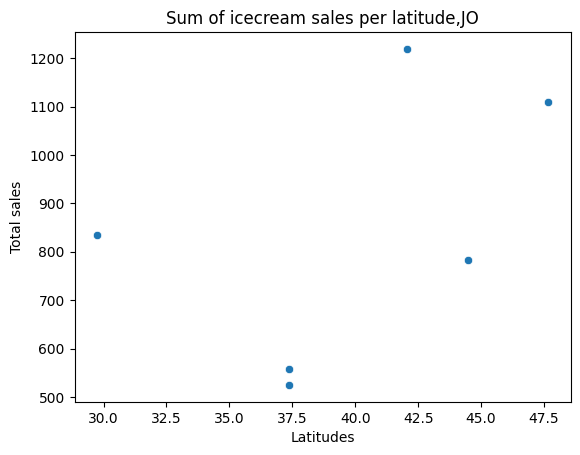

In [ ]:
# 30. (*Code)
# Using Seaborn, create a scatterplot for the total_per_shop vs the latitude. 
# Give this plot better axis labels and a title. 
#get columns and put them into a data frame 
#days_columns = [col for col in ic_wide.columns if col.endswith('day')]
#total_per_shop = ic_wide[days_columns].sum(axis=1)

# Your answer: 
ax = sns.scatterplot(data=ic_wide,y=ic_wide[days_columns].sum(axis=1),x="latitudes")
ax.set_ylabel("Total sales")
ax.set_xlabel("Latitudes")
ax.set_title("Sum of icecream sales per latitude,JO")
ax


In [ ]:
# 31. (*Response) 
# Answer this question: In these data, do you see an obvious trend related to 
# latitude and ice cream consumption pattern? 

# Your answer: 
#No, the plot does not show a correlation between latitude and ice cream consumption
# 

# Part 1c: short answer

Answer the following short questions based on what we covered in this lab. 

In [ ]:
# 32. (*Response) How do we subset columns of a dataframe? 
# 33. (*Response) Briefly (max 1-2 sentences) describe how to choose rows of a dataframe 
# based on a characteristic of the data in those rows. 
# 34. (*Response) Which function transforms wide data into long data? 
# 35. (*Response) What is the Index of a dataframe? 
# 36. (*Response) Which function makes a column of the dataframe become its index instead? 
# 37. (*Response) Does this code permanently remove a column of the dataframe or 
# simply drop a column from a temporary copy of a dataframe? 
# ic_wide.drop(columns='address')
# 38. (*Response) Which format is needed for most types of plots in modern data 
# visualization software: long or wide? 
# 39. (*Response) Which format is needed for heat maps in Seaborn specifically: 
# long or wide? 


# Your answers: 
# 32.Create a list of all the columns that you want in the subset and then index them through the a data frame variable. An example of this is Q18.

# 33.Rows can be chosen based a characteristic such as the index number of the row or the a distinct ID number associated with the row. The index or ID is then
#indexed through the data frame. An example is ic_wide[index]

# 34. The .melt function. An example of it's usage with a data frame titled df is df.melt().

# 35. It's a unique label that's ascribed to a row. It provides a way to distinctly identify a row.

# 36. The .set_index() function . An example of it's usage with a data frame titled df is df.set_index().

# 37. It drops a column from a temporary copy of a dataframe

# 38. Long

# 39. Wide


# Wrapping up
- Please remember to title and label any plots before turning this in.
- Check your work by re-running from the top cell. 
- Download your file to turn in using File - Download ipynb

# Next lab
In the next pandas lab, we will work with grouping data (split-apply-combine), differences between a Pandas DataFrame vs. Series, the inverse function to set_index(), converting data types in Pandas, making lasting changes to the actual dataframe rather than to a temporary copy, and merging/joining dataframes. 